# Aula 04 - Regressão Polinomial

In [200]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='darkgrid')
import random

In [2]:
data_table = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')
data_table

,Peso,Altura,Cateter
0,18.140590,1.087122,37.0
1,42.403628,1.612903,50.0
2,16.099773,0.952502,34.0
3,13.605442,1.003302,36.0
4,23.582766,1.155702,43.0
5,7.709751,0.977902,28.0
6,17.460317,1.092202,37.0
7,3.854875,0.571501,20.0
8,14.965986,0.939802,34.0
9,4.308390,0.596901,30.0


In [4]:
#Podemos criar atributos a partir de um atributo ja existente?
data_table['Altura^2']=data_table.Altura**2
data_table
#podemos obter um modelo não linear nos dados mas linear nos parametros

,Peso,Altura,Cateter,Altura^2
0,18.140590,1.087122,37.0,1.181835
1,42.403628,1.612903,50.0,2.601457
2,16.099773,0.952502,34.0,0.907260
3,13.605442,1.003302,36.0,1.006615
4,23.582766,1.155702,43.0,1.335648
5,7.709751,0.977902,28.0,0.956292
6,17.460317,1.092202,37.0,1.192906
7,3.854875,0.571501,20.0,0.326614
8,14.965986,0.939802,34.0,0.883228
9,4.308390,0.596901,30.0,0.356291


# Polinomial Regression - Analytics
### Imaginary data

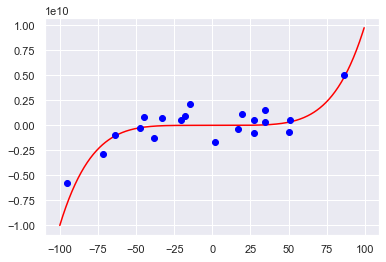

,samples_x,samples_y,result
0,34.5,3.581286e+08,4.887598e+07
1,27.0,5.734670e+08,1.434891e+07
2,17.0,-3.973439e+08,1.419857e+06
3,-95.0,-5.804116e+09,-7.737809e+09
4,-45.0,8.674825e+08,-1.845281e+08
5,-18.0,8.841575e+08,-1.889568e+06
6,-38.5,-1.294003e+09,-8.458700e+07
7,-47.5,-3.006930e+08,-2.418065e+08
8,27.5,-7.371709e+08,1.572764e+07
9,-72.0,-2.835554e+09,-1.934918e+09


In [5]:
samples=20
P_order=5
x=np.arange(-100,100,0.5)
y=x**P_order
c=random.choices(x,k=samples)
yc=list(map(lambda i : i**P_order, c))
noise=np.random.normal(10**4,10**9,samples)
ynoisy=yc+noise
plt.plot(x,y,'-',color='red')
plt.plot(c,ynoisy,'o',color='blue')

plt.show()
poli=pd.DataFrame({'samples_x':c,'samples_y':ynoisy,'result':yc})
poli

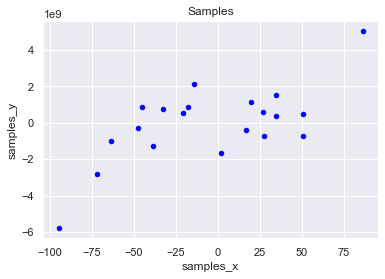

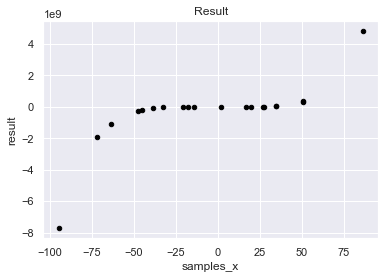

In [36]:
poli.plot('samples_x','samples_y',kind='scatter',color='blue',title='Samples')
poli.plot('samples_x','result',kind='scatter',color='black',title='Result')
plt.show()

#### Separando em treino e teste

In [21]:
X = np.asanyarray(poli['samples_x'])
y = np.asanyarray(poli['samples_y'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
def poli_x(x, P_order):
    poli_x=[]
    for i in range(P_order+1):
        poli_x.append(x**i)
    return poli_x

In [51]:

def W_update(W):
    E = y - Y_pred
    # regra de atualização
    W = W + alpha*(E@X)/N
    return W

C:\ProgramData\Anaconda3\envs\M_L\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in matmul
  


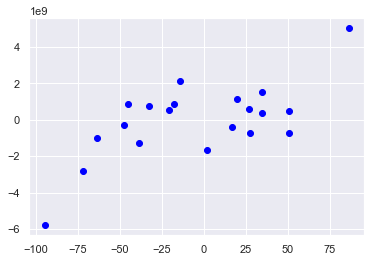

In [349]:
#na maneira analítica, há problemas de escolha do alpha e da ordem do polinomio
alpha = 0.00000000001
x=poli.samples_x
y=poli.samples_y
N=len(x)
P_order=5
X=[]
for i in x:
    X.append(poli_x(i,P_order))
# adortando parametros
cols=np.shape(X)[1]
W = np.zeros(cols)
for i in range(1000):
    Y_pred= X@W
    poli['predictions'] = Y_pred
    W = W_update(W)
plt.plot(poli.samples_x,poli.samples_y,'o',color='blue')
plt.plot(poli.samples_x,poli.predictions,'o',color='red')

# Implementando o Scikit lean


In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [385]:
def polinomial_regression(X,y,degree):
    feat = PolynomialFeatures(degree=degree)
    X_norm = feat.fit_transform(X.reshape(-1,1))
    #linearizando os valores
    lr_model = LinearRegression()
    lr_model.fit(X_norm,y)
    y_pred = lr_model.predict(X_norm)

    #getting parameters
    W = lr_model.coef_
    inf_x = np.arange(-100,100,0.5) 
    X_ = poli_x(inf_x,degree)
    inf_y = W@X_

    #ploting data
    df = pd.DataFrame({'X':X,'y':y,'preds':y_pred})
    df.sort_values(by='X',ascending=True,inplace=True)
    plt.scatter(df.X,df.y,label='Y(x)')
    plt.plot(inf_x,inf_y,color='red',label='Ajuste')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Polinomio de ordem '+ str(degree))
    plt.legend()
    plt.show()

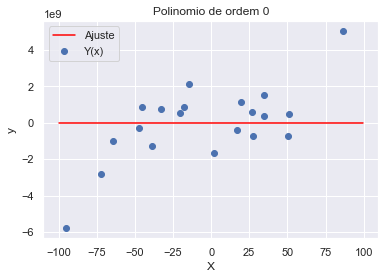

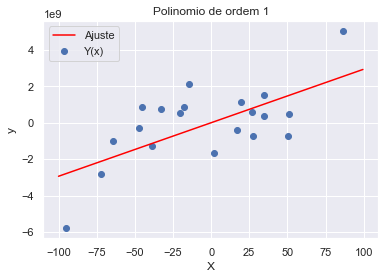

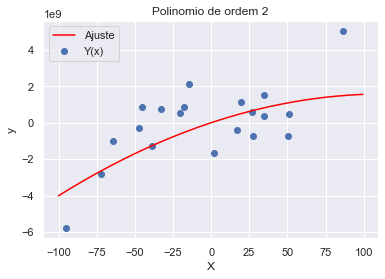

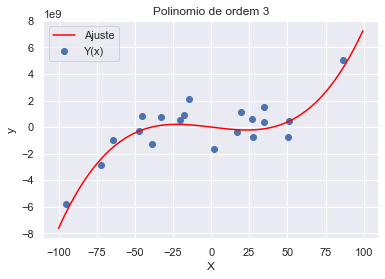

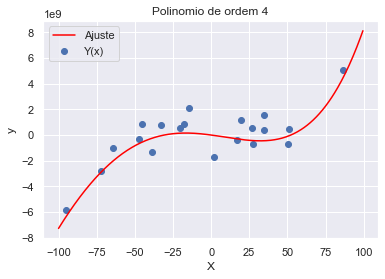

In [389]:
X = poli['samples_x'].values
y = poli['samples_y']
for p in range(5):
    polinomial_regression(X,y,p)